In [0]:
import numpy as np
import matplotlib.pyplot as plt

# spiral

In [0]:
from math import *
theta = np.empty(0)
for i in range(7):  
    theta = np.append(theta, np.linspace(i*pi/2, (i+1)*pi/2, 4*i + 4))
r = theta
ax = r * np.cos(theta)
ay = r * np.sin(theta)
bx = -r * np.cos(theta)
by = -r * np.sin(theta)

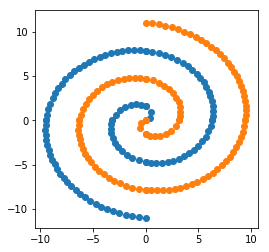

In [3]:
plt.figure(figsize=(4,4))
plt.scatter(ax, ay)
plt.scatter(bx, by)

# combine

In [4]:
label = np.append(np.zeros(ax.shape[0]), np.ones(bx.shape[0]))
label.shape

(224,)

In [5]:
x = np.append(ax, bx)
y = np.append(ay, by)
x.shape

(224,)

In [6]:
X = np.stack((x, y), axis=-1)
X.shape

(224, 2)

In [7]:
f = np.random.rand(X.shape[0]) < 0.8
Xtrain = X[f]
Xtest = X[~f]
label_train = label[f]
label_test = label[~f]
print(Xtrain.shape)
print(Xtest.shape)

(173, 2)
(51, 2)


# learning

In [8]:
import keras
from keras.layers import *
import tensorflow as tf

Using TensorFlow backend.


In [0]:
TOTAL_CLASS = 2

In [0]:
model = keras.Sequential([
        Dense(128, activation='relu'),    
        Dense(64, activation='relu'),    
        Dense(32, activation='relu'),    
        Dense(2, activation='softmax'),    
]) 

In [11]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.fit(Xtrain, label_train, epochs=200) # , shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
173/173 [==============================] - 0s 927us/step - loss: 0.7296 - acc: 0.5376
Epoch 2/200
173/173 [==============================] - 0s 81us/step - loss: 0.6492 - acc: 0.6301
Epoch 3/200
173/173 [==============================] - 0s 67us/step - loss: 0.6353 - acc: 0.6127
Epoch 4/200
173/173 [==============================] - 0s 73us/step - loss: 0.6255 - acc: 0.6243
Epoch 5/200
173/173 [==============================] - 0s 69us/step - loss: 0.6237 - acc: 0.6416
Epoch 6/200
173/173 [==============================] - 0s 91us/step - loss: 0.6191 - acc: 0.6358
Epoch 7/200
173/173 [==============================] - 0s 67us/step - loss: 0.6258 - acc: 0.6474
Epoch 8/200
173/173 [==============================] - 0s 67us/step - loss: 0.6179 - acc: 0.6416
Epoch 9/200
173/173 [==============================] - 0s 66us/step - loss: 0.6178 - acc: 0.6474
Epoch 10/200
173/173 [==============================] - 0s 72us/step - loss: 0

In [13]:
test_loss, test_acc = model.evaluate(Xtest, label_test)  

print('Test accuracy:', test_acc)

51/51 [==============================] - 0s 672us/step
Test accuracy: 0.9803921568627451
